In [1]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 114, done.
remote: Counting objects: 100% (114/114), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 5750 (delta 70), reused 65 (delta 37), pack-reused 5636
Receiving objects: 100% (5750/5750), 8.53 MiB | 7.16 MiB/s, done.
Resolving deltas: 100% (3914/3914), done.
/content/yolov5
     |████████████████████████████████| 645kB 5.7MB/s 
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%%writefile dataset.yaml
train: /content/drive/MyDrive/indian-cars-dataset/train.txt
val: /content/drive/MyDrive/indian-cars-dataset/val.txt

nc: 1

names: ['license_plate']

Writing dataset.yaml


In [4]:
%cd models
!cat yolov5s.yaml
%cd ..

/content/yolov5/models
# parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, C3, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat b

In [5]:
pip install wandb

     |████████████████████████████████| 2.1MB 5.8MB/s 
     |████████████████████████████████| 163kB 37.3MB/s 
     |████████████████████████████████| 133kB 35.8MB/s 
     |████████████████████████████████| 102kB 8.2MB/s 
     |████████████████████████████████| 71kB 8.4MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp37-none-any.whl size=6489 sha256=f2628f6fac2ff8947e205a93c8624b587ee8f5b7f7f9212cd03457287e7b68b4
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
  Created wheel for pathtools: filename=pathtools-0.1.2-cp37-none-any.whl size=8786 sha256=d957cd6c501c5e8cba84befb7613428e76a6b5beb6ec2d94472f7055481246cf
  Stored in directory: /root/.cache/pip/wheels/0b/04/79/c3b0c3a0266a3cb4376da31e5bfe8bba0c489246968a68e843
Successfully built subprocess32 pathtools


In [7]:
!python train.py --batch 32 --epochs 100  --data dataset.yaml --weights yolov5s.pt --cache

github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v5.0-7-g1487bc8 torch 1.8.1+cu101 CUDA:0 (Tesla K80, 11441.1875MB)

Namespace(adam=False, artifact_alias='latest', batch_size=32, bbox_interval=-1, bucket='', cache_images=True, cfg='', data='dataset.yaml', device='', entity=None, epochs=100, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp2', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=32, upload_dataset=False, weights='yolov5s.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
2021-04-14 11:45:20.315563: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynami

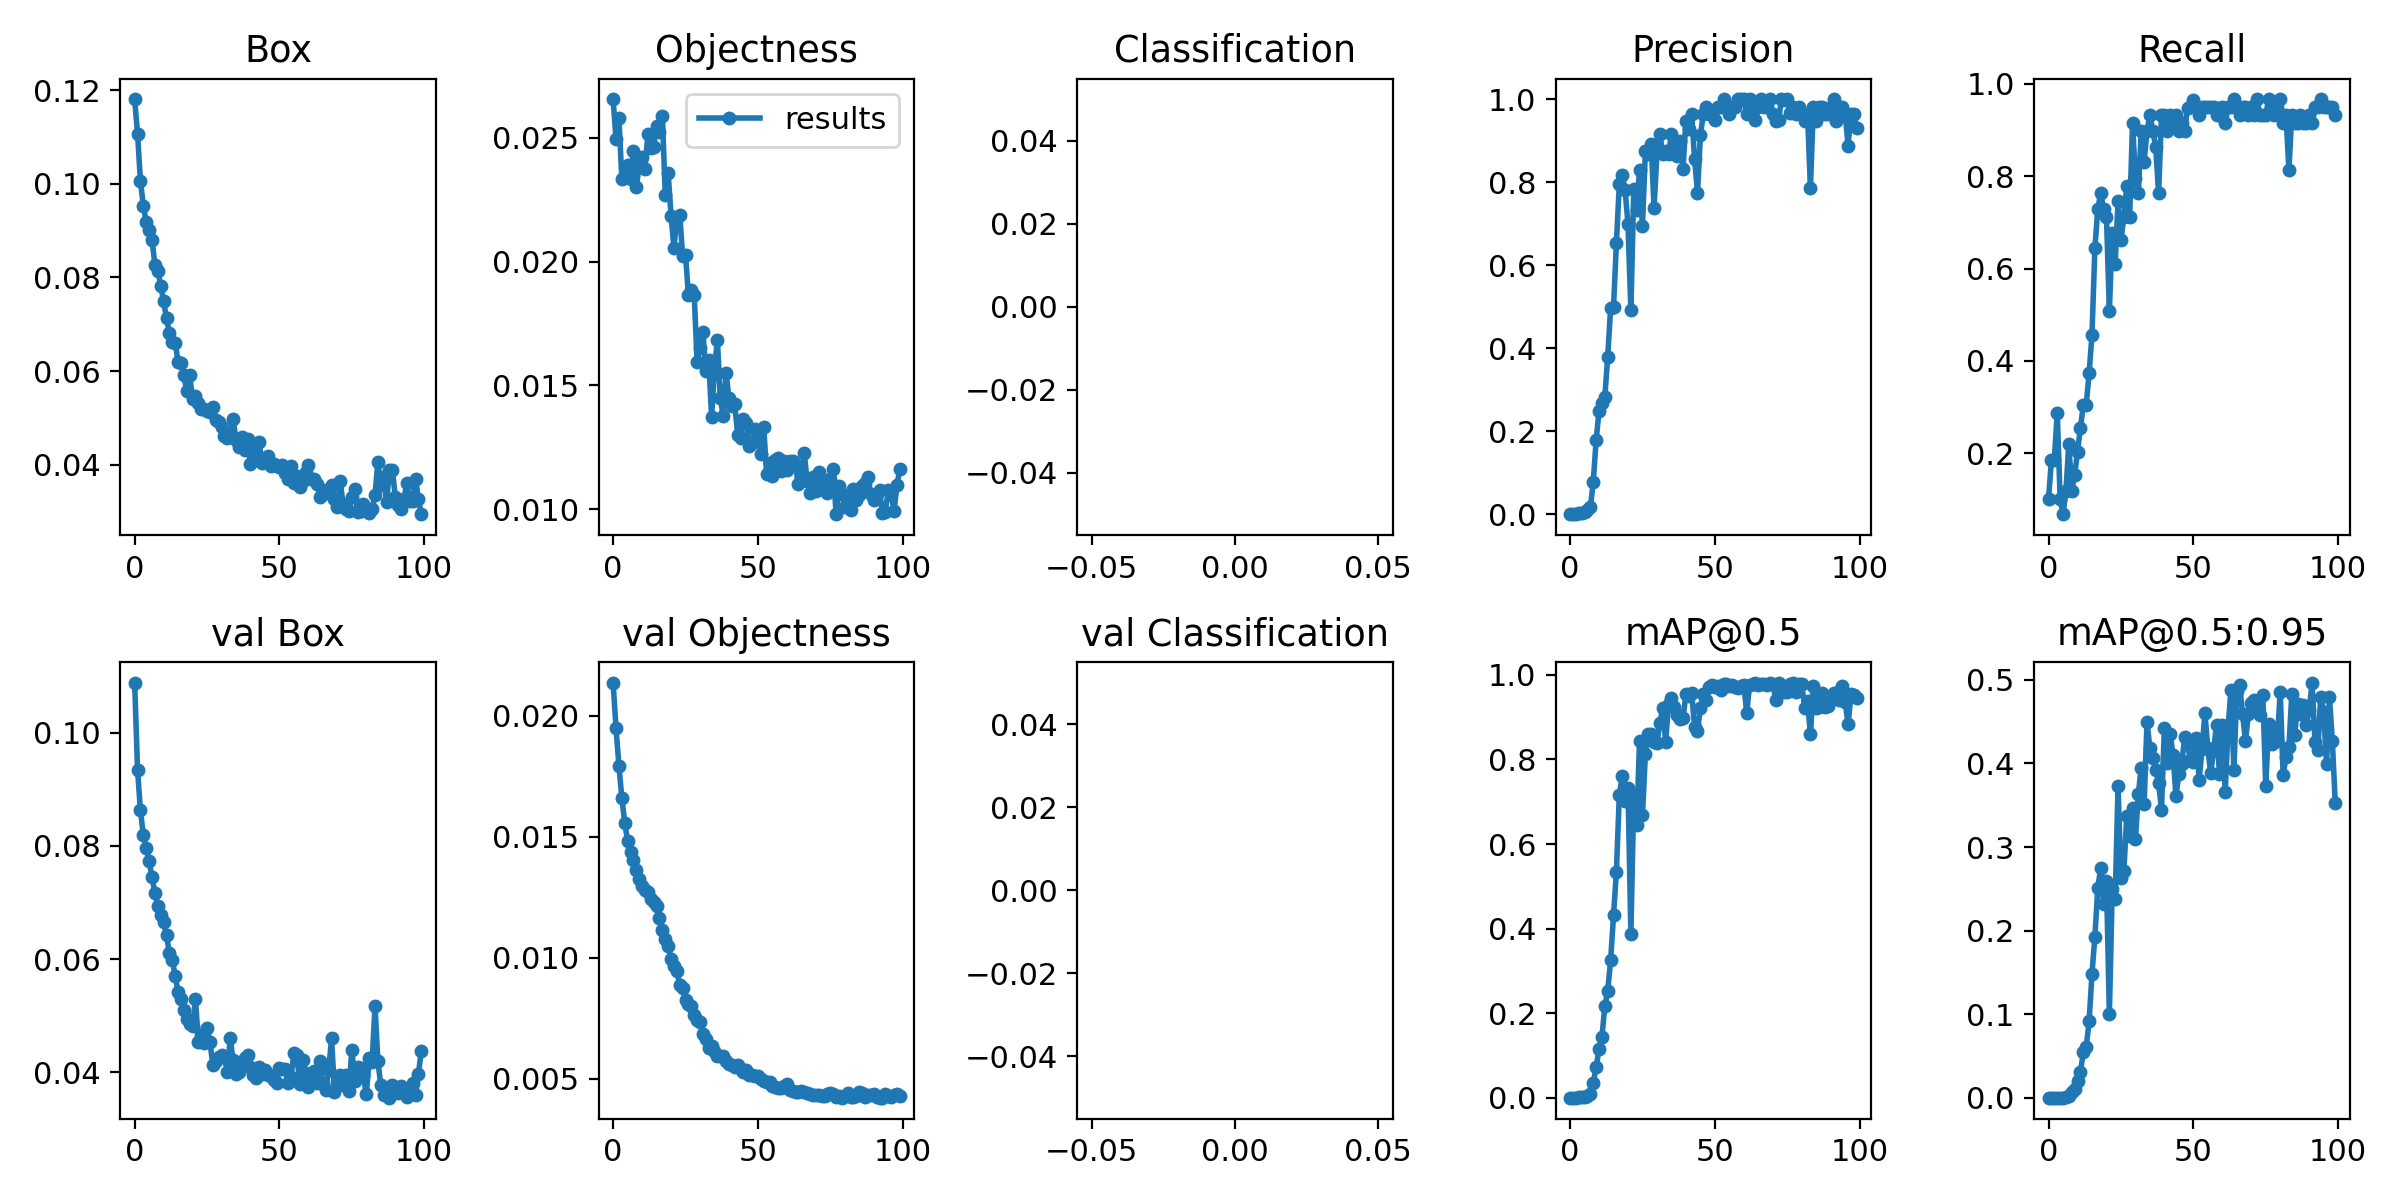

In [12]:
Image('/content/yolov5/runs/train/exp2/results.png',width=600)

In [24]:
test_img='/content/drive/MyDrive/car-dataset/images/Cars0.png'
!python detect.py --source {test_img} --weights /content/yolov5/runs/train/exp2/weights/best.pt --save-txt --exist-ok

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=True, img_size=640, iou_thres=0.45, name='exp', nosave=False, project='runs/detect', save_conf=False, save_txt=True, source='/content/drive/MyDrive/car-dataset/images/Cars0.png', update=False, view_img=False, weights=['/content/yolov5/runs/train/exp2/weights/best.pt'])
YOLOv5 🚀 v5.0-7-g1487bc8 torch 1.8.1+cu101 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 224 layers, 7053910 parameters, 0 gradients, 16.3 GFLOPS
image 1/1 /content/drive/MyDrive/car-dataset/images/Cars0.png: 352x640 1 license_plate, Done. (0.029s)
Results saved to runs/detect/exp
2 labels saved to runs/detect/exp/labels
Done. (0.052s)


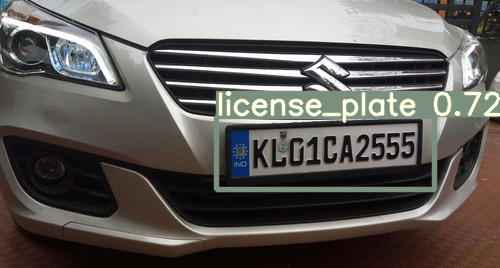

In [25]:
Image('/content/yolov5/runs/detect/exp/Cars0.png',width=500)

In [ ]:
!zip -r /content/file.zip /content/yolov5